In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

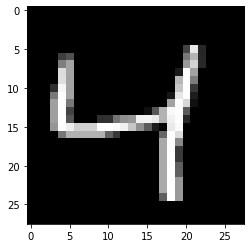

In [3]:
plt.imshow(Image.fromarray(X_train[2]).convert('RGBA'))
plt.show()

#### Преобразование размерности данных в наборе + нормализация + one hot encoding

In [4]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test1 = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

X_train = X_train.astype('float32')
X_train = X_train / 255

X_test1 = X_test1.astype('float32')
X_test1 = X_test1 / 255

y_train = utils.to_categorical(y_train, 10)

In [5]:
model = Sequential()

# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(X_train, y_train, batch_size=200, epochs=20,  verbose=1)


Epoch 1/20
300/300 [==============================] - 3s 9ms/step - loss: 0.2742 - accuracy: 0.9221
Epoch 2/20
300/300 [==============================] - 3s 9ms/step - loss: 0.1108 - accuracy: 0.9680
Epoch 3/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0716 - accuracy: 0.9793
Epoch 4/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0510 - accuracy: 0.9849
Epoch 5/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0367 - accuracy: 0.9891
Epoch 6/20
300/300 [==============================] - 3s 11ms/step - loss: 0.0274 - accuracy: 0.9927
Epoch 7/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0195 - accuracy: 0.9950
Epoch 8/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0145 - accuracy: 0.9967
Epoch 9/20
300/300 [==============================] - 3s 10ms/step - loss: 0.0116 - accuracy: 0.9974
Epoch 10/20
300/300 [==============================] - 3s 9ms/step - loss: 0.0079 - accuracy: 0.99

In [10]:
prediction = model.predict(X_test1)
y = np.argmax(prediction, axis=1)
y

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

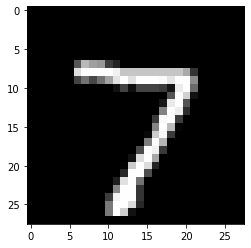

In [11]:
plt.imshow(Image.fromarray(X_test[0]).convert('RGBA'))
plt.show()